# Wooldridge Introductory Econometrics - Chapter 2

## Example 2.3

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Woolridge/ceosal1.xls',header=None)

In [176]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1281.119617,13.282297,6923.793301,17.184211,10.800478,61.803828,0.320574,0.220096,0.287081,0.172249,6.950386,8.292265
std,1372.345308,32.633921,10633.271159,8.518509,97.219400,68.177052,0.467818,0.415306,0.453486,0.378503,0.566374,1.013160
min,223.000000,-61.000000,175.200000,0.500000,-98.900000,-58.000000,0.000000,0.000000,0.000000,0.000000,5.407172,5.165928
25%,736.000000,-1.000000,2210.300000,12.400000,-21.200000,21.000000,0.000000,0.000000,0.000000,0.000000,6.601230,7.700883
50%,1039.000000,9.000000,3705.200000,15.500000,-3.000000,52.000000,0.000000,0.000000,0.000000,0.000000,6.946014,8.217492
75%,1407.000000,20.000000,7177.000000,20.000000,19.500000,81.000000,1.000000,0.000000,1.000000,0.000000,7.249215,8.878636
max,14822.000000,212.000000,97649.900000,56.300000,977.000000,418.000000,1.000000,1.000000,1.000000,1.000000,9.603868,11.489140


Note that the first column is the salary of the CEO's and 4th column is the ROE

First task is to setup a simple linear regression model explaining CEOs salaries interms of ROE.

$ salary_i = \hat{\beta_0} + \hat{\beta_1}*ROE_i+\epsilon_i $ 

OLS estimates of $\hat{\beta_0}$ and $\hat{\beta_1}$ are given by

1. $\hat{\beta_0} = \bar{y_i} - \hat{\beta_1}*\bar{x_i}$
2. $\hat{\beta_1} = \frac{cov(x_i,y_i)}{var(x_i)} = \frac{\sum_{i=1}^N (x_i-\bar{x_i})(y_i-\bar{y_i})}{\sum_{i=1}^N(x_i-\bar{x_i})^2}$

In [177]:
# Given a data frame with 2 columns [y,x], this function returns OLS
# estimates of beta0 and beta1
def OLS(y,x):
  var_covar = np.cov(y,x)
  beta_1 = var_covar[1][0]/var_covar[1][1]
  beta_0 = y.mean() - beta_1 * x.mean()
  return beta_0,beta_1


In [178]:
# Note that the first column is the salary of the CEOs and 4th column is the ROE

# First, we frame a simple regression model to explain salary with ROE
# salary_i = beta0 + beta1*ROE_i + error

# Extract the columns with salary and ROE 
# and Call the function OLS() that we defined above

beta_0,beta_1 = OLS(df.iloc[:,0],df.iloc[:,3])
print (f'salary = {beta_0:.3f} + {beta_1:.3f} * ROE')


salary = 963.191 + 18.501 * ROE


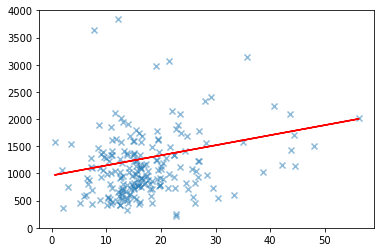

In [179]:
# Now, let us plot the model


# Setting a ylim to ignore a couple of outliers spoiling the plot
plt.ylim(0,4000)
plt.scatter(salary_ROE['ROE'],salary_ROE['salary'],marker='x',alpha=0.5)
plt.plot(salary_ROE['ROE'],beta_0+beta_1*salary_ROE['ROE'],color='red')
plt.show()

## Example 2.4



In [180]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Woolridge/wage1.xls',header=None)

In [181]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [182]:
# Note that 0 th column is the wage and 1st column is the education

b0,b1 = OLS(df.iloc[:,0],df.iloc[:,1])
print (f'wage = {b0:.2f} + {b1:.2f} * education')


wage = -0.90 + 0.54 * education


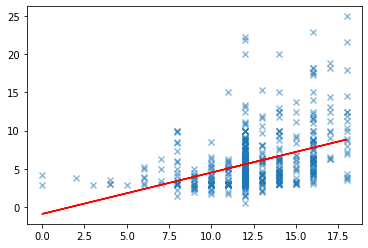

In [183]:
# Let us plot the variables
plt.scatter(df.iloc[:,1],df.iloc[:,0],marker='x',alpha=0.5)
plt.plot(df.iloc[:,1],b0+b1*df.iloc[:,1],color='red')
plt.show()

## Example 2.5

In [186]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Woolridge/vote1.xls',header=None)
df.describe()
df.head()

,0,1,2,3,4,5,6,7,8,9
0,"""AL""",7,1,68,328.30,8.74,41,5.793916,2.167567,97.41
1,"""AK""",1,0,62,626.38,402.48,60,6.439952,5.997638,60.88
2,"""AZ""",2,1,73,99.61,3.07,55,4.601233,1.120048,97.01
3,"""AZ""",3,0,69,319.69,26.28,64,5.767352,3.268846,92.40
4,"""AR""",3,0,75,159.22,60.05,66,5.070293,4.095244,72.61


state: state postal code

district: congressional district

democA: =1 if A is democrat

voteA: percent vote for A

expendA: camp. expends. by A, $1000s

expendB: camp. expends. by B, $1000s

prtystrA: percent vote for president

lexpendA: log(expendA)

lexpendB: log(expendB)

shareA: 100*(expendA/(expendA+expendB))

In [200]:

b0,b1 = OLS(df.iloc[:,3],df.iloc[:,9])
print (f'vote = {b0:.2f} + {b1:.2f} * shareA')


vote = 26.81 + 0.46 * shareA
